    1. What is the download rate by categories?

    2. What is the name of the 15 most downloaded applications? 

    3. What is the download rate for paid applications? 

    4. Sort by category.

    5. What is the download rate and user rating by category?


In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [9]:
df = pd.read_csv('googleplaystore.csv')

In [5]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [8]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
Counter(df['Category'])

Counter({'ART_AND_DESIGN': 65,
         'AUTO_AND_VEHICLES': 85,
         'BEAUTY': 53,
         'BOOKS_AND_REFERENCE': 231,
         'BUSINESS': 460,
         'COMICS': 60,
         'COMMUNICATION': 387,
         'DATING': 234,
         'EDUCATION': 156,
         'ENTERTAINMENT': 149,
         'EVENTS': 64,
         'FINANCE': 366,
         'FOOD_AND_DRINK': 127,
         'HEALTH_AND_FITNESS': 341,
         'HOUSE_AND_HOME': 88,
         'LIBRARIES_AND_DEMO': 85,
         'LIFESTYLE': 382,
         'GAME': 1144,
         'FAMILY': 1972,
         'MEDICAL': 463,
         'SOCIAL': 295,
         'SHOPPING': 260,
         'PHOTOGRAPHY': 335,
         'SPORTS': 384,
         'TRAVEL_AND_LOCAL': 258,
         'TOOLS': 843,
         'PERSONALIZATION': 392,
         'PRODUCTIVITY': 424,
         'PARENTING': 60,
         'WEATHER': 82,
         'VIDEO_PLAYERS': 175,
         'NEWS_AND_MAGAZINES': 283,
         'MAPS_AND_NAVIGATION': 137,
         '1.9': 1})

In [10]:
# replace 1.9 => 0.0
df.Category.replace(['1.9'],0.0,inplace=True)

### Installs

In [11]:
Counter(df['Installs'])

Counter({'10,000+': 1054,
         '500,000+': 539,
         '5,000,000+': 752,
         '50,000,000+': 289,
         '100,000+': 1169,
         '50,000+': 479,
         '1,000,000+': 1579,
         '10,000,000+': 1252,
         '5,000+': 477,
         '100,000,000+': 409,
         '1,000,000,000+': 58,
         '1,000+': 907,
         '500,000,000+': 72,
         '50+': 205,
         '100+': 719,
         '500+': 330,
         '10+': 386,
         '1+': 67,
         '5+': 82,
         '0+': 14,
         '0': 1,
         'Free': 1})

In [12]:
# Replace Free to 0
df.Installs.replace(['Free'],0,inplace=True)

In [13]:
df['Installs'] = df['Installs'].str.replace('+','')

In [14]:
df['Installs'] = df['Installs'].str.replace(',','')

In [15]:
Counter(df['Installs'])

Counter({'10000': 1054,
         '500000': 539,
         '5000000': 752,
         '50000000': 289,
         '100000': 1169,
         '50000': 479,
         '1000000': 1579,
         '10000000': 1252,
         '5000': 477,
         '100000000': 409,
         '1000000000': 58,
         '1000': 907,
         '500000000': 72,
         '50': 205,
         '100': 719,
         '500': 330,
         '10': 386,
         '1': 67,
         '5': 82,
         '0': 15,
         nan: 1})

In [16]:
df['Installs'] = pd.to_numeric(df['Installs'])

### Type

In [17]:
Counter(df['Type'])

Counter({'Free': 10039, 'Paid': 800, nan: 1, '0': 1})

In [18]:
df[df['Type']=='0']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,0,19.0,3.0M,"1,000+",NaN,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [19]:
df['Type'].iloc[10472] = 'Free'

In [20]:
df['Type'][df['Type'].isnull()] = 'Free'

In [21]:
Counter(df['Type'])

Counter({'Free': 10041, 'Paid': 800})

### Size

In [22]:
Counter(df['Size'])

Counter({'19M': 154,
         '14M': 194,
         '8.7M': 39,
         '25M': 143,
         '2.8M': 65,
         '5.6M': 31,
         '29M': 103,
         '33M': 79,
         '3.1M': 56,
         '28M': 95,
         '12M': 196,
         '20M': 139,
         '21M': 138,
         '37M': 76,
         '2.7M': 53,
         '5.5M': 33,
         '17M': 160,
         '39M': 56,
         '31M': 70,
         '4.2M': 59,
         '7.0M': 33,
         '23M': 117,
         '6.0M': 34,
         '6.1M': 39,
         '4.6M': 46,
         '9.2M': 33,
         '5.2M': 35,
         '11M': 198,
         '24M': 136,
         'Varies with device': 1695,
         '9.4M': 24,
         '15M': 184,
         '10M': 136,
         '1.2M': 41,
         '26M': 149,
         '8.0M': 23,
         '7.9M': 33,
         '56M': 31,
         '57M': 37,
         '35M': 72,
         '54M': 29,
         '201k': 3,
         '3.6M': 57,
         '5.7M': 48,
         '8.6M': 25,
         '2.4M': 48,
         '27M': 97,
        

In [23]:
df['Size'][df['Size']=='Varies with device'] = '0'

In [5]:
def change_size(size):
    if 'M' in size:
        x = size[:-1]
        x = float(x)*1024*1024
        return(x)
    elif 'k' == size[-1:]:
        x = size[:-1]
        x = float(x)*1024
        return(x)
    else:
        return size

In [6]:
float(st[:-1])*1024*1024

NameError: name 'st' is not defined

In [12]:
df["Size"] = df["Size"].map(change_size)

TypeError: argument of type 'float' is not iterable

In [26]:
df['Size'] = pd.to_numeric(df['Size'])

ValueError: Unable to parse string "1,000+" at position 10472

In [27]:
df['Size'].iloc[10472] = 1000

In [28]:
df['Size'] = pd.to_numeric(df['Size'])

In [29]:
df['Size'].isnull().sum()

0

### Content Rating

In [30]:
df[df['Content Rating'].isnull()].index.tolist()

[10472]

In [31]:
Counter(df['Content Rating'])

Counter({'Everyone': 8714,
         'Teen': 1208,
         'Everyone 10+': 414,
         'Mature 17+': 499,
         'Adults only 18+': 3,
         'Unrated': 2,
         nan: 1})

In [32]:
df['Content Rating'].iloc[df[df['Content Rating'].isnull()].index.tolist()]='Everyone'
#  df['Content Rating'].iloc[10472]='Everyone'

### Rating

In [33]:
Counter(df['Installs'])

Counter({10000.0: 1054,
         500000.0: 539,
         5000000.0: 752,
         50000000.0: 289,
         100000.0: 1169,
         50000.0: 479,
         1000000.0: 1579,
         10000000.0: 1252,
         5000.0: 477,
         100000000.0: 409,
         1000000000.0: 58,
         1000.0: 907,
         500000000.0: 72,
         50.0: 205,
         100.0: 719,
         500.0: 330,
         10.0: 386,
         1.0: 67,
         5.0: 82,
         0.0: 15,
         nan: 1})

In [34]:
ratings_null = df[(df['Installs']<=5000) & (df['Rating'].isnull())].index.tolist()

In [35]:
len(ratings_null)

1396

In [36]:
df['Rating'].isnull().sum()

1474

In [37]:
mean = df[df['Installs']<=5000]['Rating'].mean()

In [38]:
df['Rating'].iloc[ratings_null] = mean

In [39]:
df['Rating'].isnull().sum()

78

In [40]:
ratings_null1 = df[(df['Installs']>5000) & (df['Rating'].isnull())].index.tolist()

In [41]:
mean1 = df[df['Installs']>5000]['Rating'].mean()

In [42]:
df['Rating'].iloc[ratings_null1] = mean1

In [43]:
df['Rating'].isnull().sum()

0

### 1. What is the download rate by categories?

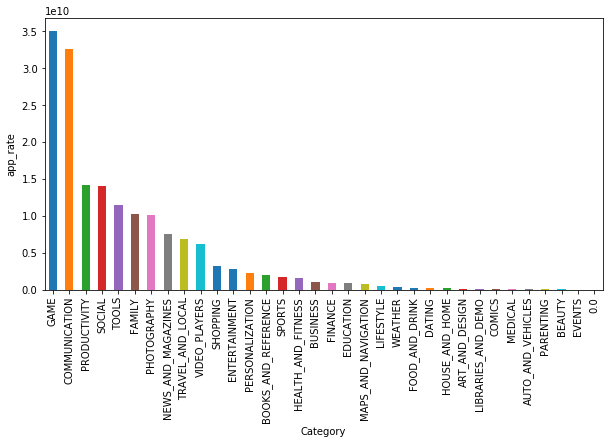

In [44]:
plt.figure(figsize=(10,5))
plt.xlabel('Category')
plt.ylabel('app_rate')
df.groupby('Category')['Installs'].sum().sort_values(ascending=False).plot(kind='bar')

In [45]:
dd = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

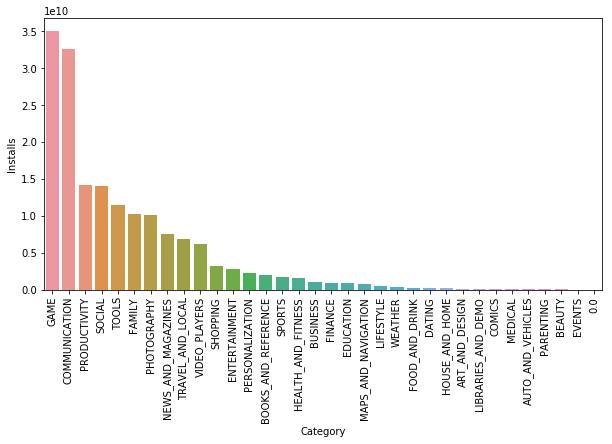

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x=dd.index,y=dd)
plt.xticks(rotation=90)

### 2. What is the name of the 15 most downloaded applications?

In [47]:
df_new = df.groupby('App')['Installs'].sum().sort_values(ascending=False)
print(df_new.head())

App
Subway Surfers    6.000000e+09
Instagram         4.000000e+09
Google Drive      4.000000e+09
Hangouts          4.000000e+09
Google Photos     4.000000e+09
Name: Installs, dtype: float64


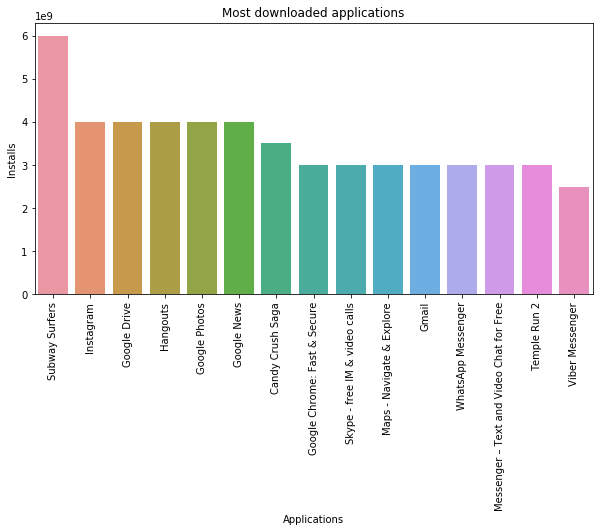

In [48]:
plt.figure(figsize=(10,5))
sns.barplot(x=df_new.head(15).index, y=df_new.head(15))
plt.xticks(rotation=90)
plt.xlabel('Applications')
plt.ylabel('Installs')
plt.title('Most downloaded applications')
plt.show()

In [49]:
df_new.shape

(9660,)

### 3. What is the download rate for paid applications?

In [50]:
df['Type'].value_counts()

Free    10041
Paid      800
Name: Type, dtype: int64

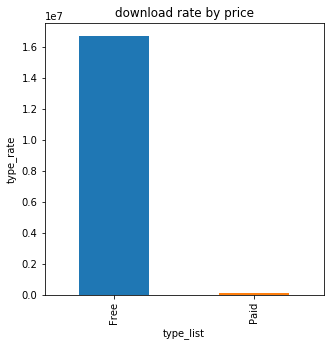

In [51]:
plt.figure(figsize=(5,5))

df.groupby('Type')['Installs'].mean().sort_values(ascending=False).plot(kind='bar')

plt.xlabel('type_list')
plt.ylabel('type_rate')
plt.title('download rate by price')
plt.show()

In [52]:
# sns.countplot(x='Type', data=df)

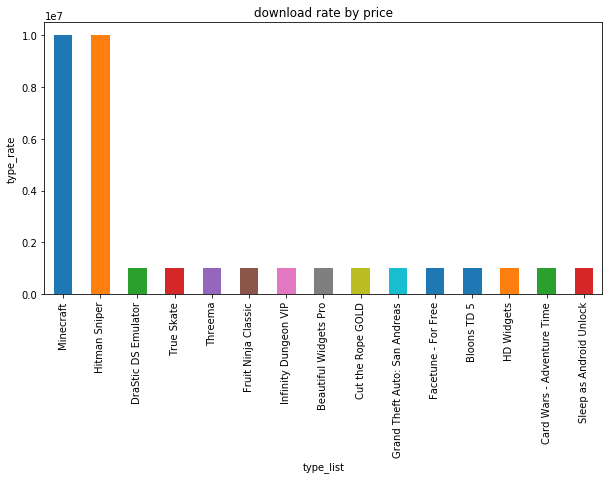

In [53]:
plt.figure(figsize=(10,5))

df[df['Type']=='Paid'].groupby('App')['Installs'].mean().sort_values(ascending=False).head(15).plot(kind='bar')

plt.xlabel('type_list')
plt.ylabel('type_rate')
plt.title('download rate by price')
plt.show()

### 4. Sort by category.

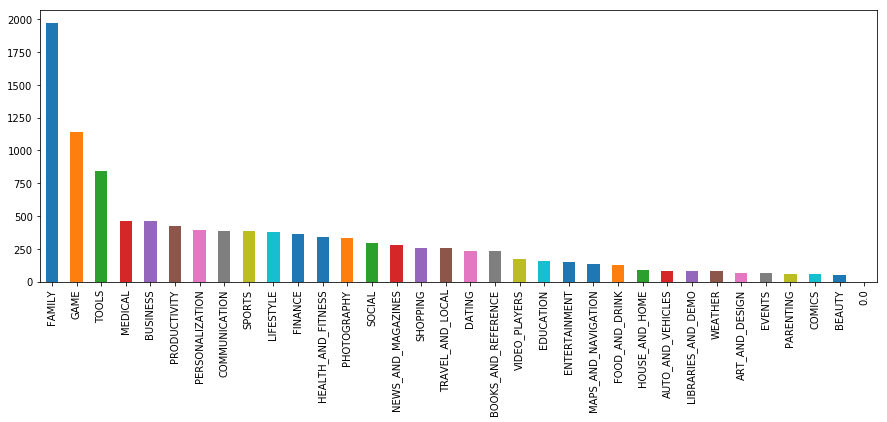

In [56]:
plt.figure(figsize=(15,5))
df['Category'].value_counts().plot(kind = 'bar')

### 5. What is the download rate and user rating by category?

In [93]:
df['Category'].iloc[df[df['Category']==0.0].index]='0.0'

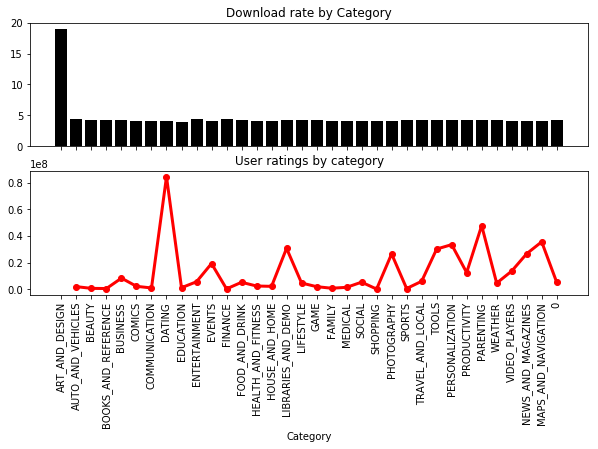

<Figure size 720x360 with 0 Axes>

In [99]:
category  = df ['Category'].unique().tolist()
ratings   = df.groupby('Category')['Rating'].mean().tolist()
installs   = df.groupby('Category')['Installs'].mean().tolist()

f, axarr = plt.subplots(2, sharex=True, figsize=(10,5))

axarr[0].bar(category, ratings, label = 'Download rate by Category', color='k',  linewidth=3)
axarr[0].set_title('Download rate by Category')

axarr[1].plot(category, installs, label = 'User ratings by category', color='r', marker='o', linewidth=3)
axarr[1].set_title('User ratings by category')

# plt.xticks(monthList)
plt.xlabel('Category')
# plt.ylabel('Sales units in number')
plt.xticks(rotation=90)
# plt.tight_layout()
plt.figure(figsize=(10,5))
plt.show()

In [79]:
df1 = df.groupby('Category')['Installs','Rating'].mean()
df1.head()

,Installs,Rating
Category,,
0.0,NaN,19.000000
ART_AND_DESIGN,1.912894e+06,4.349442
AUTO_AND_VEHICLES,6.250613e+05,4.185675
BEAUTY,5.131519e+05,4.258196
BOOKS_AND_REFERENCE,8.318050e+06,4.303217


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

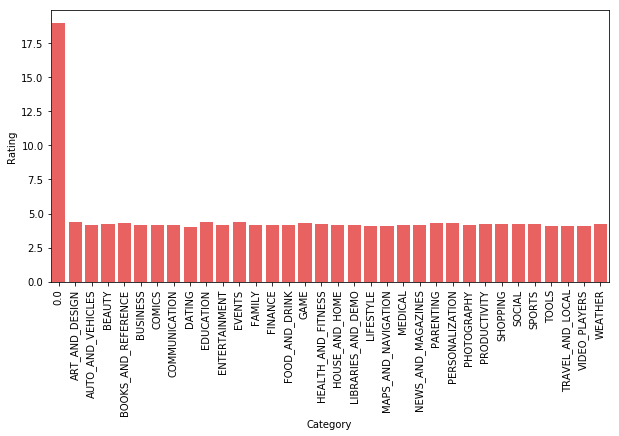

In [82]:
plt.figure(figsize = (10,5))

sns.barplot(x=df1.index, y=df1['Rating'],color='red',alpha = 0.7)
plt.xticks(rotation= 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

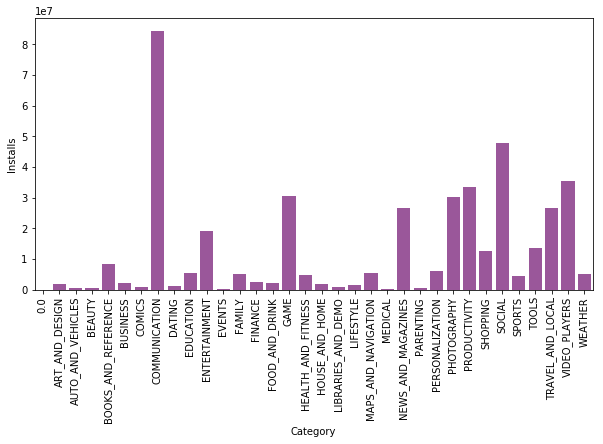

In [83]:
plt.figure(figsize = (10,5))
sns.barplot(x=df1.index, y=df1['Installs'],color='purple',alpha = 0.7)
plt.xticks(rotation= 90)

In [101]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          1
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

In [102]:
df[df['Installs'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,0,19.0,3.0M,1000.0,NaN,Free,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,NaN


In [103]:
df['Installs'].iloc[10472] = df['Installs'].mean()

In [104]:
df.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                                0
Rating                                                 19
Reviews                                              3.0M
Size                                                 1000
Installs                                      1.54643e+07
Type                                                 Free
Price                                            Everyone
Content Rating                                   Everyone
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [105]:
import pickle

fh = open("df.pkl", "bw")
pickle.dump(df, fh)
fh.close()

In [106]:
import pickle
f = open('df.pkl',"rb")
df = pickle.load(f)
f.close()

In [107]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000000.0,10000.0,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000000.0,500000.0,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700000.0,5000000.0,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000000.0,50000000.0,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800000.0,100000.0,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
